<a href="https://colab.research.google.com/github/22zunaid/Data-science/blob/master/sp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
!pip install chart_studio

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot


In [101]:
TTM=pd.read_csv("TTM.csv")
TTM.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-02-03,11.54,11.69,11.40,11.68,11.68,2503100
1,2020-02-04,11.78,11.88,11.69,11.73,11.73,1757500
2,2020-02-05,12.82,12.90,12.60,12.64,12.64,2380700
3,2020-02-06,12.73,12.73,12.32,12.36,12.36,2399900
4,2020-02-07,12.08,12.08,11.85,11.91,11.91,1851000


In [102]:
TTM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       254 non-null    object 
 1   Open       254 non-null    float64
 2   High       254 non-null    float64
 3   Low        254 non-null    float64
 4   Close      254 non-null    float64
 5   Adj Close  254 non-null    float64
 6   Volume     254 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [103]:
TTM['Date'] = pd.to_datetime(TTM['Date'])

In [104]:
print(f'Dataframe contains stock prices between{TTM.Date.min()}{TTM.Date.max()}')
print(f'Total days ={(TTM.Date.max() - TTM.Date.min()).days} days')

Dataframe contains stock prices between2020-02-03 00:00:002021-02-03 00:00:00
Total days =366 days


In [105]:
TTM.describe()

,Open,High,Low,Close,Adj Close,Volume
count,254.000000,254.000000,254.000000,254.000000,254.000000,2.540000e+02
mean,9.069213,9.215827,8.916654,9.071654,9.071654,2.271138e+06
std,3.507984,3.558711,3.506465,3.545592,3.545592,1.150118e+06
min,4.200000,4.240000,3.920000,4.080000,4.080000,3.034170e+05
25%,6.610000,6.757500,6.470000,6.602500,6.602500,1.452750e+06
50%,8.835000,8.915000,8.610000,8.755000,8.755000,2.020900e+06
75%,11.082500,11.212500,11.007500,11.057500,11.057500,2.880550e+06
max,21.690001,22.600000,22.190001,22.580000,22.580000,7.642200e+06


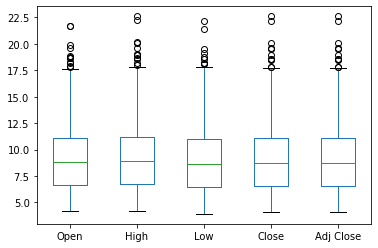

In [106]:
TTM[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [107]:
TTM["Date"]=pd.to_datetime(TTM.Date,format="%Y-%m-%d")
TTM.index=TTM['Date']

In [108]:
#building regression model
from sklearn.model_selection import train_test_split

#for preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#for model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score


In [109]:
#split the data into training and test sets
X = np.array (TTM.index).reshape(-1,1)
Y= TTM['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=101)


In [110]:
#features scailing
scaler = StandardScaler().fit(X_train)

In [111]:
from sklearn.linear_model import LinearRegression

In [112]:
#creating a linear model
lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

TypeError: ignored

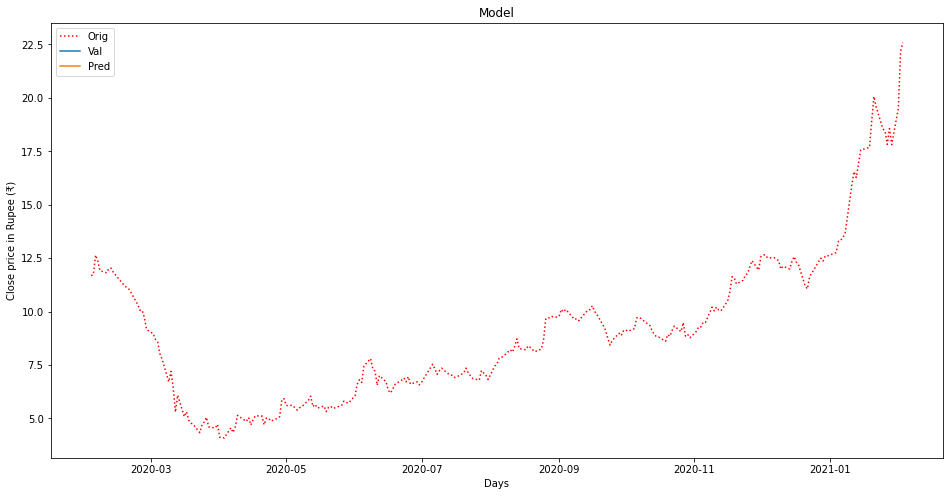

In [127]:

#plot the actual and predicted  values for atrain  dataset
predictions = lm

valid = TTM[X.shape[0]:]
valid['Prediction'] = predictions
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close price in Rupee (₹)')
plt.plot(TTM['Close'],linestyle='dotted',color='#ff0000')
plt.plot(valid[['Close' , 'Prediction']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.plot(valid[predictions()])
plt.show()
